# Market Segmentation Analysis - Mcdonalds_dataset

# Imorting Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading Dataset

In [2]:
data = pd.read_csv('mcdonalds_dataset.csv')
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


# Data Preprocessing

In [5]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
# Checking null values...
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
data.mean()

C:\Users\MY-PC\AppData\Local\Temp/ipykernel_13028/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Age    44.604955
dtype: float64

In [10]:
data.median()

C:\Users\MY-PC\AppData\Local\Temp/ipykernel_13028/4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Age    45.0
dtype: float64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [12]:
df = data.groupby(['Gender', 'VisitFrequency'])
df.first()

yummy convenient spicy fattening greasy fast  \
Gender VisitFrequency                                                       
Female Every three months       No        Yes    No       Yes     No  Yes   
       More than once a week   Yes        Yes   Yes       Yes     No  Yes   
       Never                    No         No    No       Yes    Yes  Yes   
       Once a month            Yes        Yes    No       Yes    Yes  Yes   
       Once a week             Yes        Yes    No       Yes    Yes  Yes   
       Once a year             Yes        Yes    No       Yes    Yes  Yes   
Male   Every three months      Yes        Yes    No       Yes     No  Yes   
       More than once a week   Yes        Yes    No       Yes    Yes  Yes   
       Never                    No        Yes    No       Yes    Yes  Yes   
       Once a month             No        Yes    No       Yes    Yes  Yes   
       Once a week             Yes        Yes    No       Yes     No  Yes   
       Once a year              No         No    No       Yes    Yes   No   

                             cheap tasty expensive healthy disgusting  \
Gender VisitFrequency                                                   
Female Every three months      Yes    No       Yes      No         No   
       More than once a week    No   Yes       Yes      No         No   
       Never                   Yes    No        No      No        Yes   
       Once a month            Yes   Yes        No      No         No   
       Once a week             Yes   Yes        No      No        Yes   
       Once a year              No   Yes       Yes      No        Yes   
Male   Every three months      Yes   Yes        No      No         No   
       More than once a week    No   Yes       Yes      No        Yes   
       Never                   Yes    No        No      No        Yes   
       Once a month            Yes    No        No     Yes         No   
       Once a week             Yes   Yes        No     Yes         No   
       Once a year              No    No       Yes      No        Yes   

                                      Like  Age  
Gender VisitFrequency                            
Female Every three months               -3   61  
       More than once a week  I love it!+5   50  
       Never                            -4   35  
       Once a month                      0   34  
       Once a week                      +4   69  
       Once a year                      +2   41  
Male   Every three months               +2   55  
       More than once a week  I love it!+5   37  
       Never                            -4   37  
       Once a month                     +2   49  
       Once a week                      +4   48  
       Once a year            I hate it!-5   58

In [13]:
# There are many categorical value columns So, we need to convert to numerical values
data['yummy'] = data['yummy'].replace({'No':'0', 'Yes':'1'})
data['convenient'] = data['convenient'].replace({'No':'0', 'Yes':'1'})
data['spicy'] = data['spicy'].replace({'No':'0', 'Yes':'1'})
data['fattening'] = data['fattening'].replace({'No':'0', 'Yes':'1'})
data['greasy'] = data['greasy'].replace({'No':'0', 'Yes':'1'})
data['fast'] = data['fast'].replace({'No':'0', 'Yes':'1'})
data['cheap'] = data['cheap'].replace({'No':'0', 'Yes':'1'})
data['tasty'] = data['tasty'].replace({'No':'0', 'Yes':'1'})
data['expensive'] = data['expensive'].replace({'No':'0', 'Yes':'1'})
data['healthy'] = data['healthy'].replace({'No':'0', 'Yes':'1'})
data['disgusting'] = data['disgusting'].replace({'No':'0', 'Yes':'1'})
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [14]:
data['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data["Like"] = LE.fit_transform(data["Like"])
data['Like'] = pd.to_numeric(data['Like'])

data["Like"].unique()

array([ 6,  1,  0,  3, 10,  9,  5,  2,  8,  7,  4])

In [31]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
feature_array = OHE.fit_transform(data[['VisitFrequency']]).toarray()

In [32]:
OHE.categories_

[array(['Every three months', 'More than once a week', 'Never',
        'Once a month', 'Once a week', 'Once a year'], dtype=object)]

In [33]:
feature_labels = np.array(OHE.categories_).ravel()

In [34]:
features = pd.DataFrame(feature_array, columns = feature_labels)
features

,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1448,0.0,0.0,0.0,0.0,0.0,1.0
1449,0.0,0.0,0.0,0.0,1.0,0.0
1450,0.0,0.0,0.0,1.0,0.0,0.0
1451,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data_new = pd.concat([data, features], axis = 1)
data_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,VisitFrequency,Gender,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,0,1,0,1,0,1,1,0,1,0,...,6,61,Every three months,Female,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,1,1,1,1,1,1,0,...,1,51,Every three months,Female,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,1,0,1,1,1,...,0,62,Every three months,Female,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,0,0,...,3,69,Once a week,Female,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0,1,1,1,1,0,0,1,...,1,49,Once a month,Male,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,9,47,Once a year,Male,0.0,0.0,0.0,0.0,0.0,1.0
1449,1,1,0,1,0,0,1,1,0,1,...,1,36,Once a week,Female,0.0,0.0,0.0,0.0,1.0,0.0
1450,1,1,0,1,0,1,0,1,1,0,...,2,52,Once a month,Female,0.0,0.0,0.0,1.0,0.0,0.0
1451,1,1,0,0,0,1,1,1,0,1,...,3,41,Every three months,Male,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data1 = data_new.drop(['VisitFrequency'], axis = 1)
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,0,1,0,1,0,1,1,0,1,0,0,6,61,Female,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,Female,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,Female,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,Female,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,Male,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,Male,0.0,0.0,0.0,0.0,0.0,1.0
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,Female,0.0,0.0,0.0,0.0,1.0,0.0
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,Female,0.0,0.0,0.0,1.0,0.0,0.0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,Male,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
data1['Gender'] = data1['Gender'].replace({'Male':'0', 'Female':'1'})
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,0,1,0,1,0,1,1,0,1,0,0,6,61,1,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,1,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,1,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,1,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,0,0.0,0.0,0.0,0.0,0.0,1.0
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,1,0.0,0.0,0.0,0.0,1.0,0.0
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,1,0.0,0.0,0.0,1.0,0.0,0.0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yummy                  1453 non-null   object 
 1   convenient             1453 non-null   object 
 2   spicy                  1453 non-null   object 
 3   fattening              1453 non-null   object 
 4   greasy                 1453 non-null   object 
 5   fast                   1453 non-null   object 
 6   cheap                  1453 non-null   object 
 7   tasty                  1453 non-null   object 
 8   expensive              1453 non-null   object 
 9   healthy                1453 non-null   object 
 10  disgusting             1453 non-null   object 
 11  Like                   1453 non-null   int32  
 12  Age                    1453 non-null   int64  
 13  Gender                 1453 non-null   object 
 14  Every three months     1453 non-null   float64
 15  More

# Data Visualization

C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


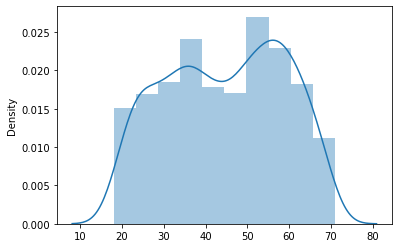

In [17]:
sns.distplot(x = data['Age'], bins = 10)
plt.show()

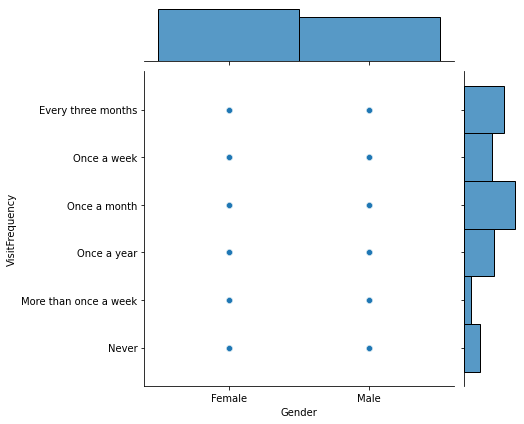

In [18]:
sns.jointplot(x = data['Gender'], y = data['VisitFrequency'], kind = 'scatter')
plt.show()

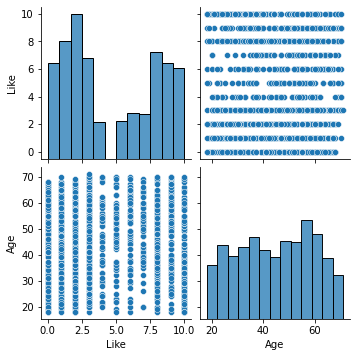

In [19]:
sns.pairplot(data)
plt.show()

C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

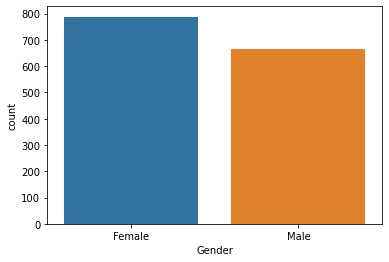

In [20]:
sns.countplot(data['Gender'])

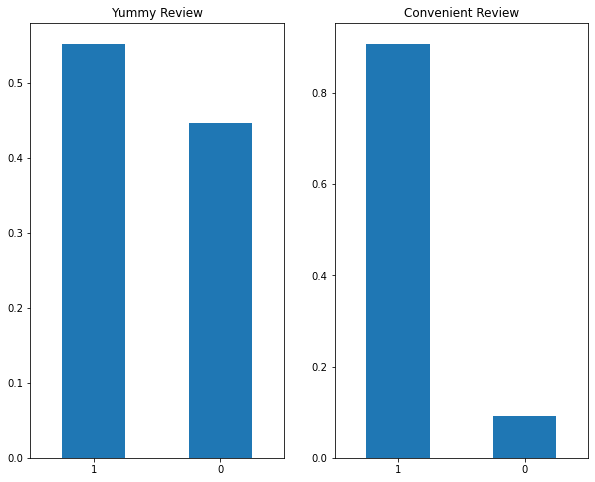

In [21]:

plt.subplot(1,2,1)
data['yummy'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Yummy Review")

plt.subplot(1,2,2)
data['convenient'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Convenient Review")

plt.show()

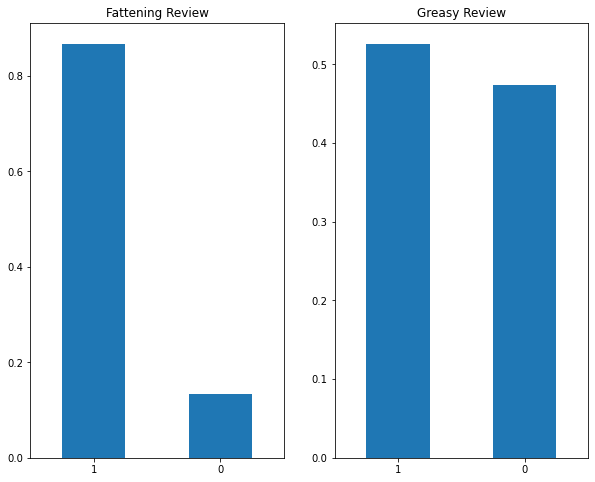

In [22]:
plt.subplot(1,2,1)
data['fattening'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Fattening Review")

plt.subplot(1,2,2)
data['greasy'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Greasy Review")

plt.show()

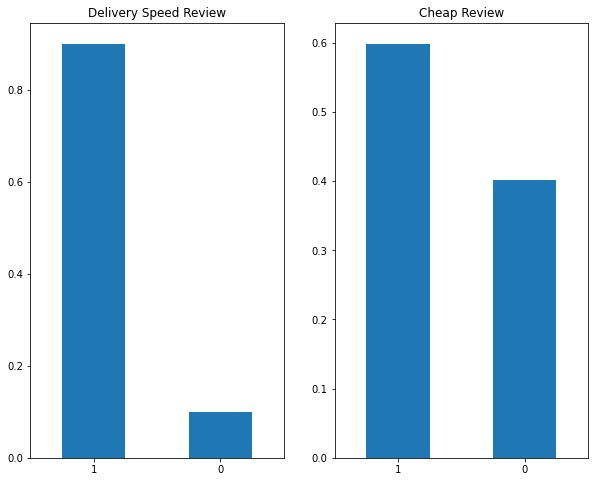

In [23]:
plt.subplot(1,2,1)
data['fast'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Delivery Speed Review")

plt.subplot(1,2,2)
data['cheap'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Cheap Review")

plt.show()

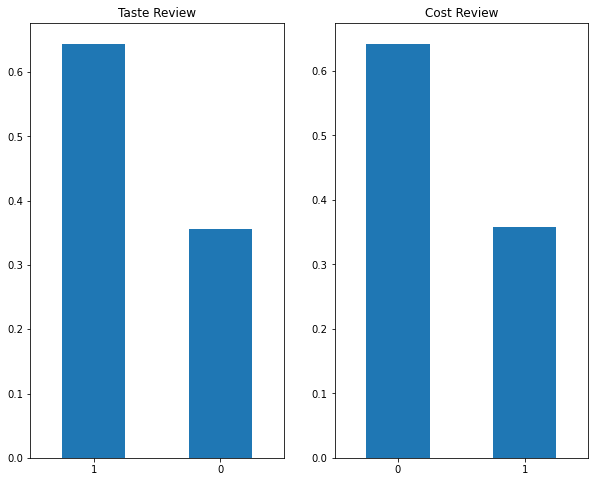

In [24]:
plt.subplot(1,2,1)
data['tasty'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Taste Review")

plt.subplot(1,2,2)
data['expensive'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Cost Review")

plt.show()

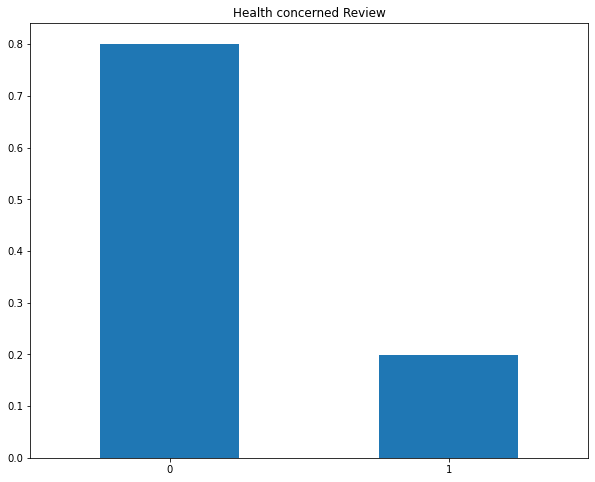

In [25]:
data['healthy'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.xticks(rotation = 0)
plt.title("Health concerned Review")

plt.show()

C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


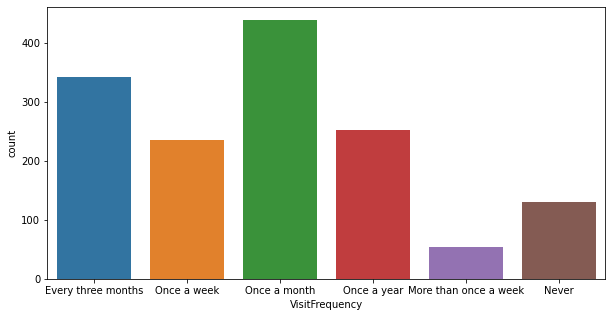

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(data['VisitFrequency'])
plt.show()

# Model Building and Evaluation

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_data = sc.fit_transform(data1)
scaled_data = pd.DataFrame(sc_data, columns = data1.columns)
scaled_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488,0.395759,1.153258,0.918645,1.802370,-0.196466,-0.314789,-0.657981,-0.439248,-0.458067
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488,-1.055624,0.449839,0.918645,1.802370,-0.196466,-0.314789,-0.657981,-0.439248,-0.458067
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488,-1.345901,1.223600,0.918645,1.802370,-0.196466,-0.314789,-0.657981,-0.439248,-0.458067
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261,-0.475071,1.715993,0.918645,-0.554825,-0.196466,-0.314789,-0.657981,2.276616,-0.458067
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488,-1.055624,0.309156,-1.088560,-0.554825,-0.196466,-0.314789,1.519801,-0.439248,-0.458067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.111479,0.318735,-0.321349,0.391375,0.948339,-3.003446,-1.221590,-1.345528,1.339489,-0.498279,1.765261,1.266589,0.168472,-1.088560,-0.554825,-0.196466,-0.314789,-0.657981,-0.439248,2.183088
1449,0.899702,0.318735,-0.321349,0.391375,-1.054476,-3.003446,0.818605,0.743203,-0.746553,2.006908,-0.566488,-1.055624,-0.605289,0.918645,-0.554825,-0.196466,-0.314789,-0.657981,2.276616,-0.458067
1450,0.899702,0.318735,-0.321349,0.391375,-1.054476,0.332951,-1.221590,0.743203,1.339489,-0.498279,-0.566488,-0.765348,0.520181,0.918645,-0.554825,-0.196466,-0.314789,1.519801,-0.439248,-0.458067
1451,0.899702,0.318735,-0.321349,-2.555092,-1.054476,0.332951,0.818605,0.743203,-0.746553,2.006908,-0.566488,-0.475071,-0.253579,-1.088560,1.802370,-0.196466,-0.314789,-0.657981,-0.439248,-0.458067


In [45]:
from sklearn.preprocessing import normalize

norm_data = normalize(sc_data)
normed_data = pd.DataFrame(norm_data, columns = data1.columns)

norm_data

array([[-0.29482456,  0.0845459 , -0.08523915, ..., -0.17453232,
        -0.11651259, -0.12150421],
       [ 0.2581547 ,  0.09145577, -0.09220568, ..., -0.1887967 ,
        -0.12603507, -0.13143466],
       [-0.20730582,  0.05944843,  0.58040859, ..., -0.12272235,
        -0.0819258 , -0.08543566],
       ...,
       [ 0.26351894,  0.09335615, -0.09412164, ...,  0.44514311,
        -0.12865398, -0.13416576],
       [ 0.19827202,  0.0702413 , -0.07081726, ..., -0.14500261,
        -0.09679943, -0.10094651],
       [-0.21553163,  0.06180732, -0.06231412, ..., -0.12759193,
        -0.08517658, -0.08882571]])

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_principal1 = pca.fit_transform(norm_data)

x_principal = pd.DataFrame(x_principal1)
x_principal.columns = ['P1', 'P2']
x_principal.head()

,P1,P2
0,0.360895,-0.277654
1,-0.164814,0.037215
2,0.100338,0.091989
3,-0.053593,-0.233877
4,-0.073129,-0.160239


In [48]:
from sklearn.cluster import KMeans

In [49]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    km = KMeans(n_clusters = n, init = 'k-means++').fit(x_principal)
    clusters_inertia.append(km.inertia_)
    silhouette_avg = silhouette_score(x_principal, km.labels_)
    s_scores.append(silhouette_avg)

C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


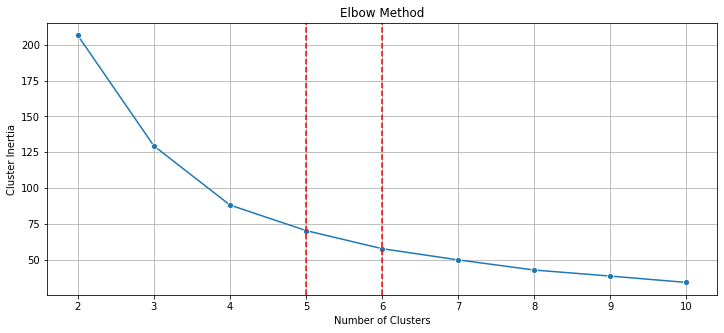

In [51]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Cluster Inertia")
ax.axvline(5, ls = "--", c = "red")
ax.axvline(6, ls = "--", c = "red")
plt.grid()
plt.show()

In [ ]:
# Silhoutte score method indicates the best options would be respectively 5 or 6 clustres.

In [ ]:
# Comparing both clusters

In [53]:
# cluster 5

km_5 = KMeans(n_clusters = 5, init = 'k-means++').fit(x_principal)

km_clustered = data1.copy()
km_clustered.loc[:,'Cluster'] = km_5.labels_

C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


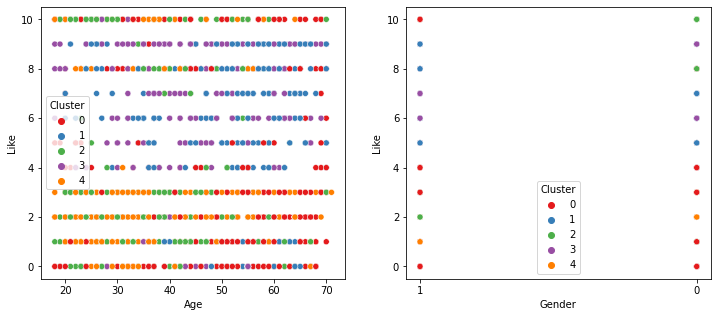

In [55]:
fig, (axes) = plt.subplots(1, 2, figsize = (12,5))
scat_1 = sns.scatterplot('Age', 'Like', data = km_clustered, hue = 'Cluster', ax = axes[0], palette = 'Set1', legend = 'full')
scat_2 = sns.scatterplot('Gender', 'Like', data = km_clustered, hue = 'Cluster', ax = axes[1], palette = 'Set1', legend = 'full')
plt.show()

In [57]:
# cluster 6
km_6 = KMeans(n_clusters = 6, init = 'k-means++').fit(x_principal)

km_clustered = data1.copy()
km_clustered.loc[:,'Cluster'] = km_6.labels_

C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


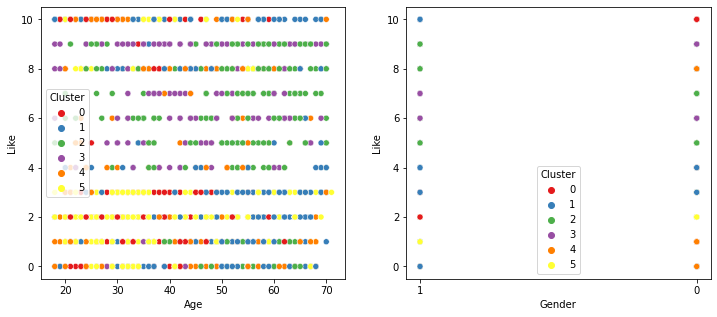

In [59]:
fig, (axes) = plt.subplots(1, 2, figsize = (12,5))
scat_1 = sns.scatterplot('Age', 'Like', data = km_clustered, hue = 'Cluster', ax = axes[0], palette = 'Set1', legend = 'full')
scat_2 = sns.scatterplot('Gender', 'Like', data = km_clustered, hue = 'Cluster', ax = axes[1], palette = 'Set1', legend = 'full')
plt.show()

# Thank you